In [ ]:
!pip install scikit-learn-intelex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 12.1 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data = pd.read_csv("test.csv.zip")

In [ ]:
data.shape

(25976, 25)

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             25976 non-null  category
 1   Customer Type                      25976 non-null  category
 2   Age                                25976 non-null  int64   
 3   Type of Travel                     25976 non-null  category
 4   Class                              25976 non-null  category
 5   Flight Distance                    25976 non-null  int64   
 6   Inflight wifi service              25976 non-null  category
 7   Departure/Arrival time convenient  25976 non-null  category
 8   Ease of Online booking             25976 non-null  category
 9   Gate location                      25976 non-null  category
 10  Food and drink                     25976 non-null  category
 11  Online boarding                    25976 

In [ ]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,14.30609,14.740857
std,15.135685,998.683999,37.42316,37.517539
min,7.000000,31.000000,0.00000,0.000000
25%,27.000000,414.000000,0.00000,0.000000
50%,40.000000,849.000000,0.00000,0.000000
75%,51.000000,1744.000000,12.00000,13.000000
max,85.000000,4983.000000,1128.00000,1115.000000


In [ ]:
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976,25976
unique,2,2,2,3,6,6,6,5,6,6,5,6,6,6,5,5,6,6
top,Female,Loyal Customer,Business travel,Business,2,4,2,3,4,4,4,4,4,4,4,4,4,4
freq,13172,21177,18038,12495,6490,6334,6030,7140,6204,7706,7991,7368,7836,7097,9378,7278,9378,6790


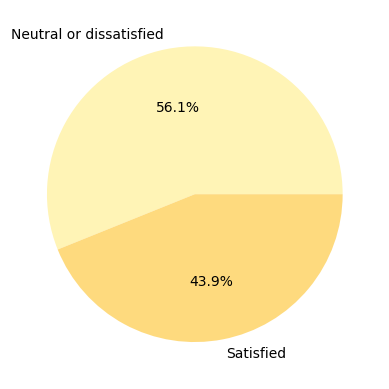

In [ ]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

In [ ]:
corr_mat = data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099409,-0.004334,-0.007400
Flight Distance,0.099409,1.000000,0.003446,0.000131
Departure Delay in Minutes,-0.004334,0.003446,1.000000,0.964502
Arrival Delay in Minutes,-0.007400,0.000131,0.964502,1.000000


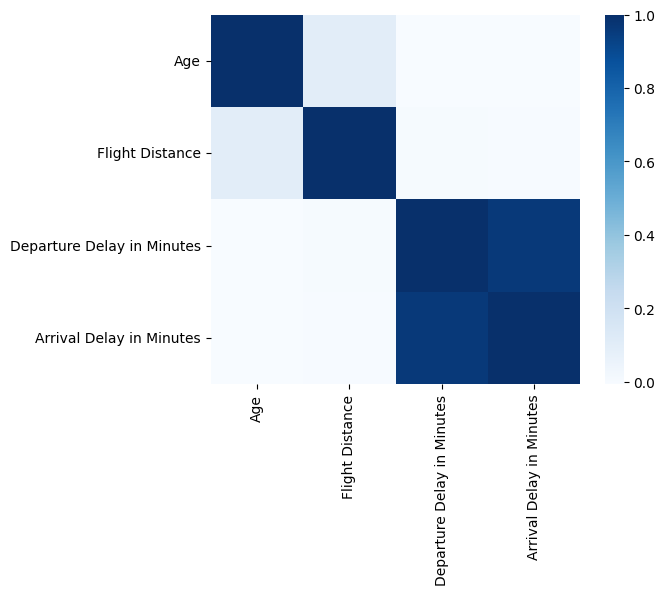

In [ ]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass


In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)


Departure Delay in Minutes  Arrival Delay in Minutes    0.964502
dtype: float64

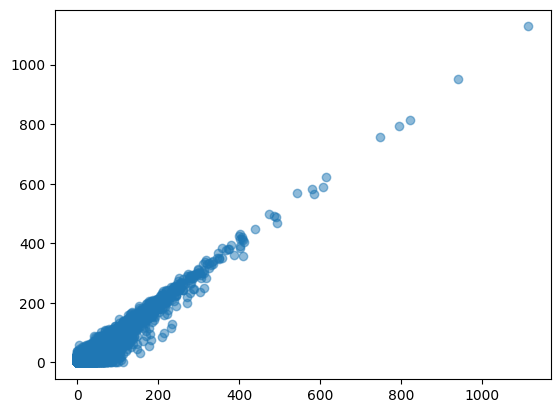

In [ ]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)
pass

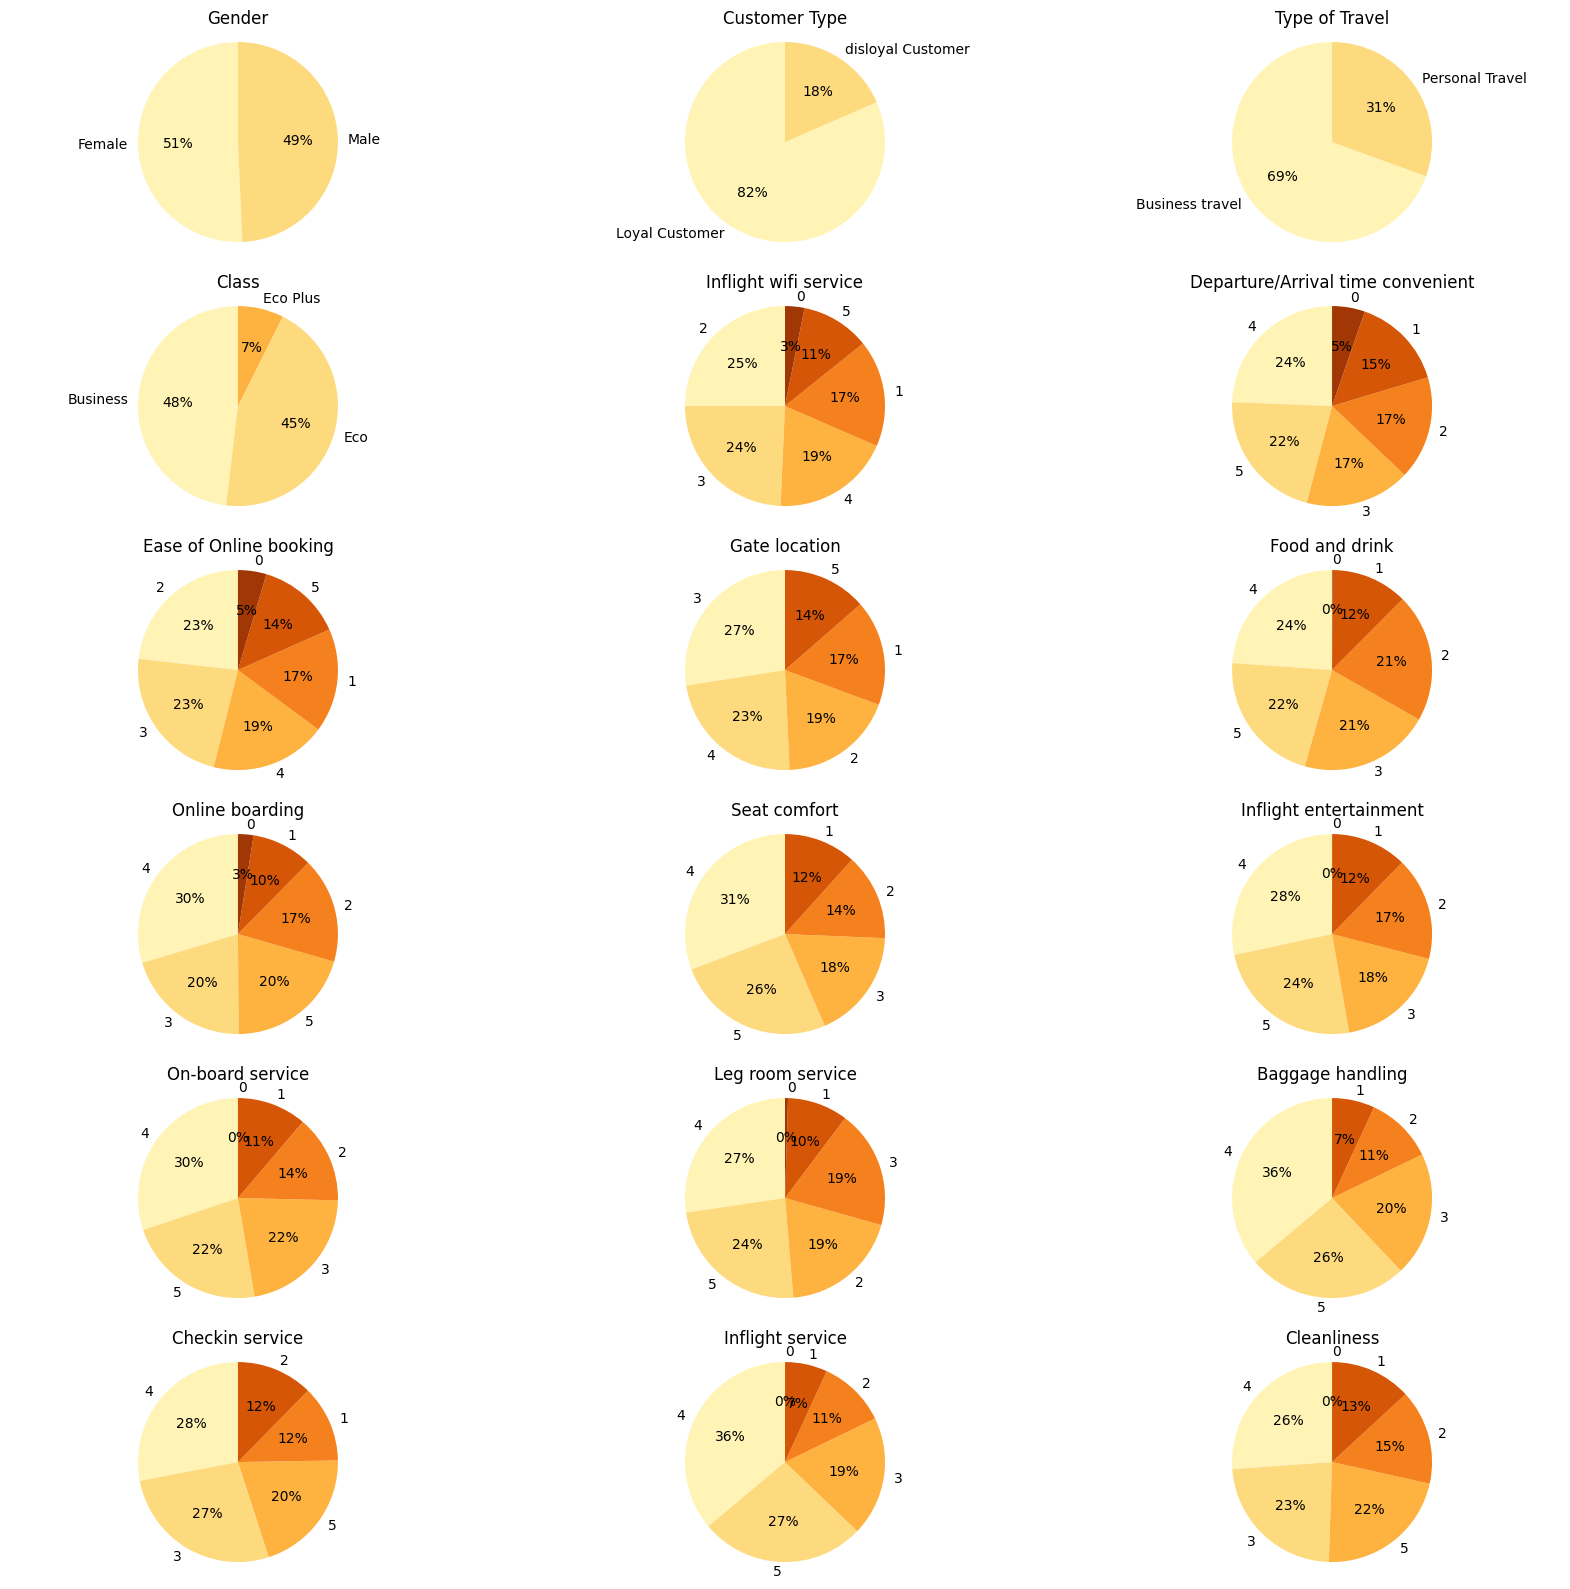

In [ ]:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

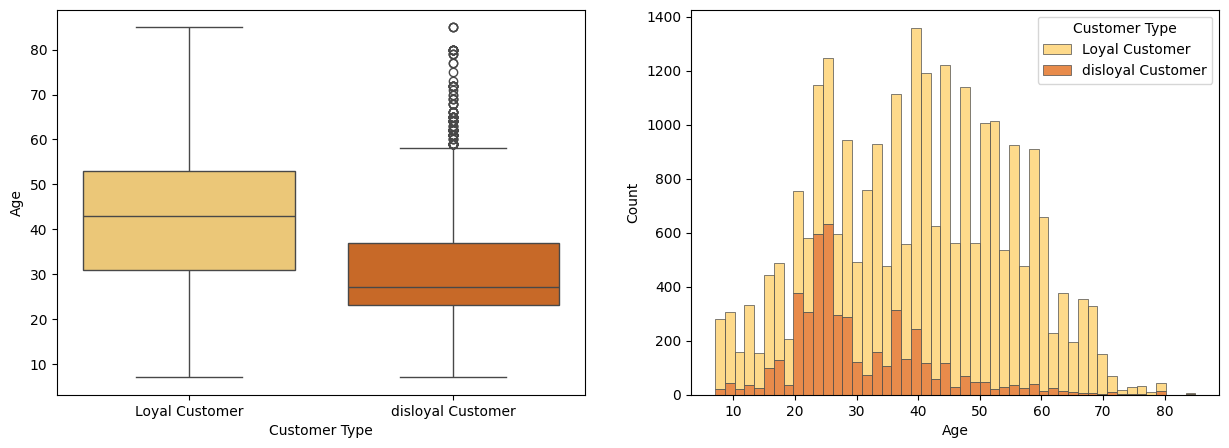

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

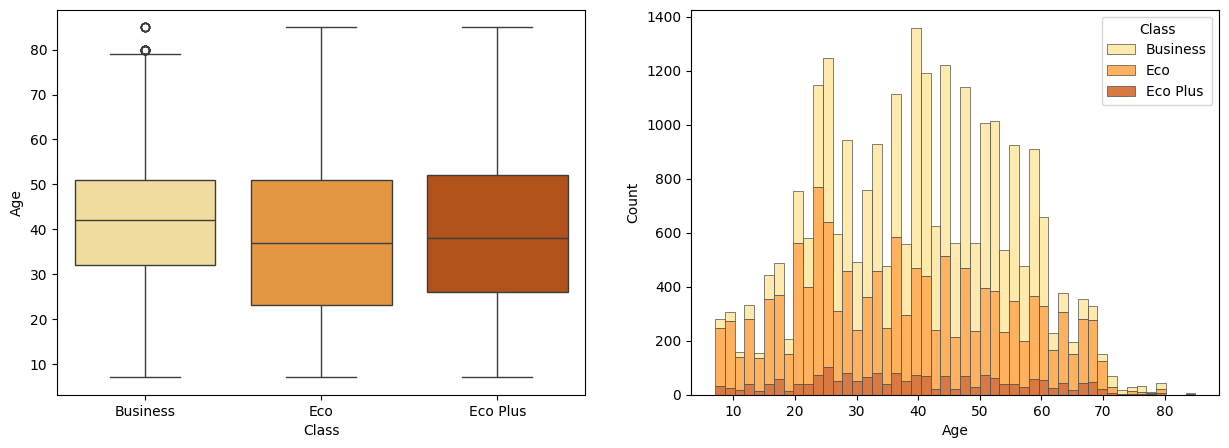

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

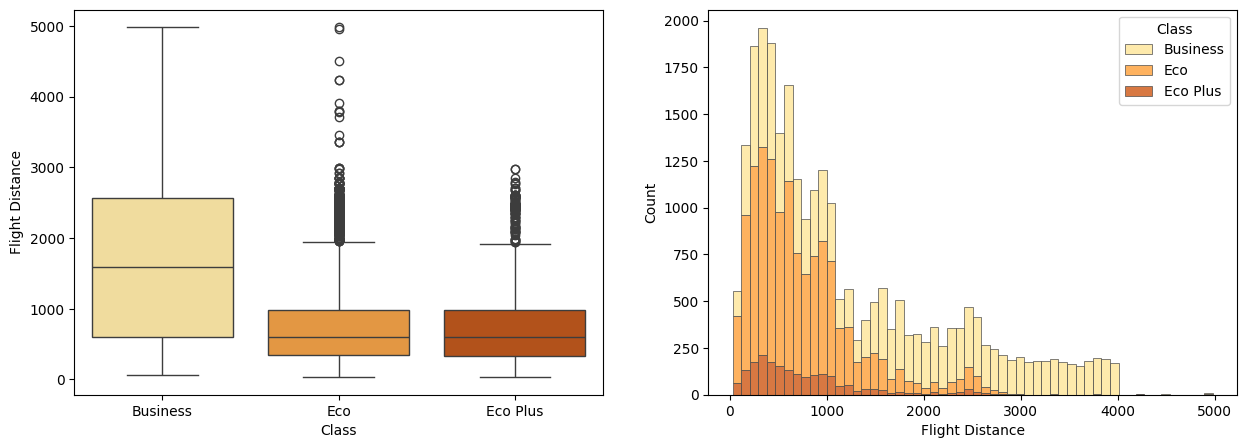

In [ ]:

f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

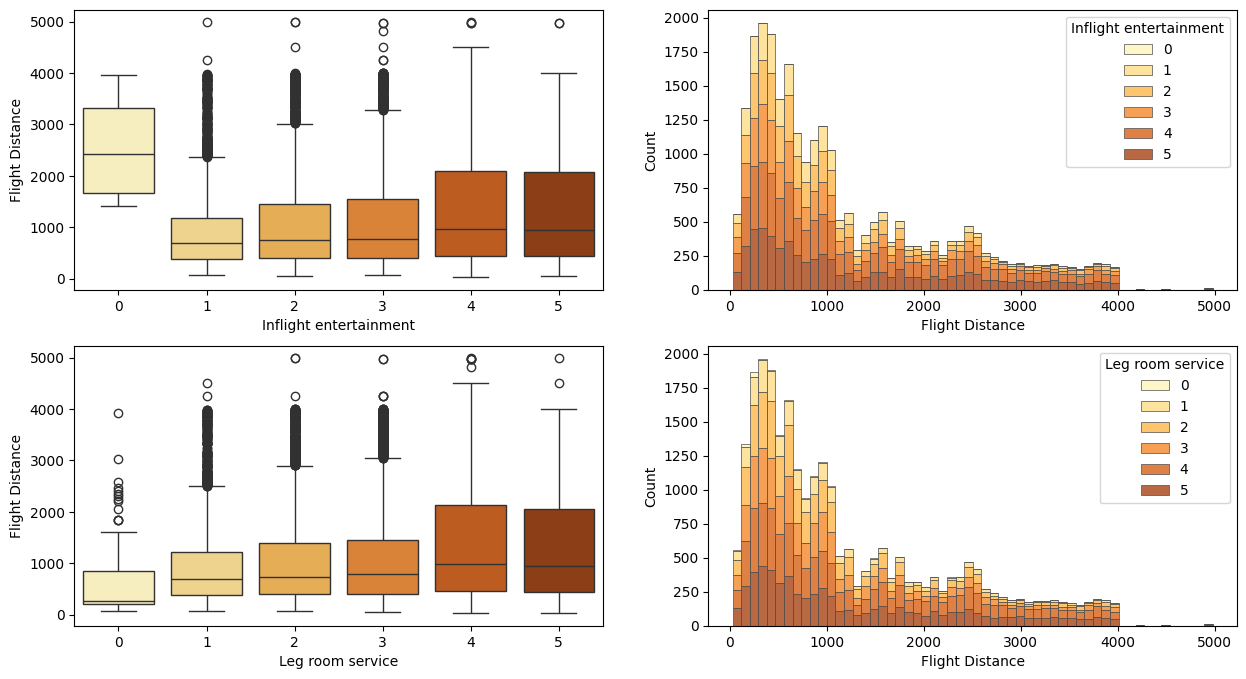

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

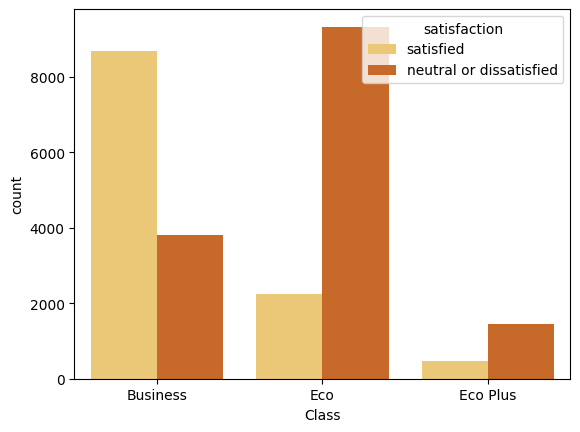

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

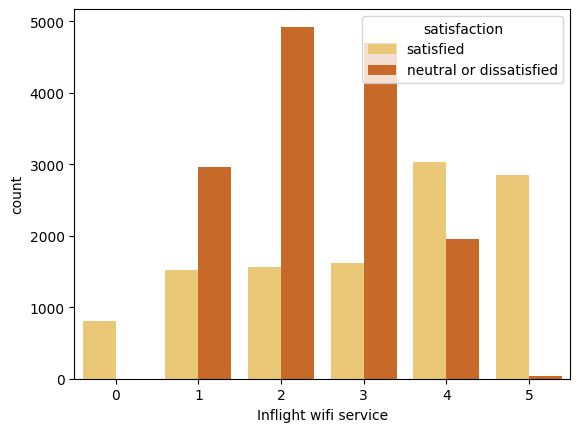

In [ ]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

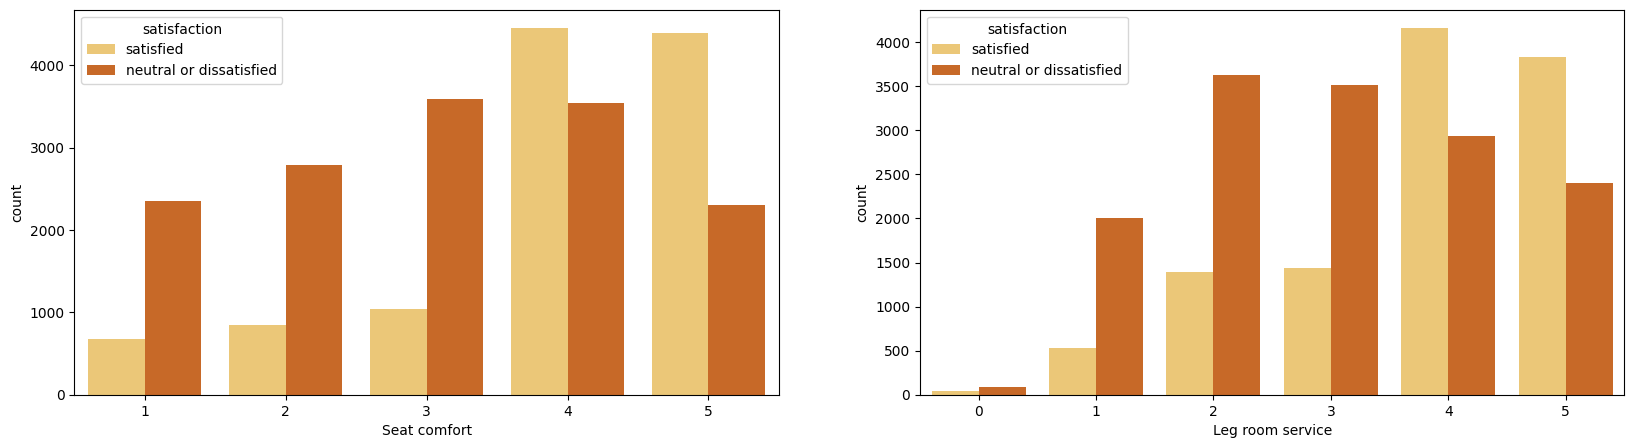

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = data, ax = ax[1])
plt.show()

In [ ]:
data.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [ ]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [ ]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
data.describe()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.00000,25976.000000
mean,39.620958,1193.788459,14.30609,14.693756
std,15.135685,998.683999,37.42316,37.466787
min,7.000000,31.000000,0.00000,0.000000
25%,27.000000,414.000000,0.00000,0.000000
50%,40.000000,849.000000,0.00000,0.000000
75%,51.000000,1744.000000,12.00000,13.000000
max,85.000000,4983.000000,1128.00000,1115.000000


In [ ]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

In [ ]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [ ]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Female, Male.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Business travel, Personal Travel.


In [ ]:
data[col] == uniq

0        False
1        False
2        False
3        False
4        False
         ...  
25971    False
25972    False
25973     True
25974    False
25975     True
Name: Type of Travel, Length: 25976, dtype: bool

In [ ]:
data[nonbinary_columns]


,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,Business,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,Eco,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,Business,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,Eco,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Business,3,3,3,1,4,3,4,4,3,2,4,4,5,4
25972,Business,4,4,4,4,4,4,4,4,4,5,5,5,5,4
25973,Eco,2,5,1,5,2,1,2,2,4,3,4,5,4,2
25974,Business,3,3,3,3,4,4,4,4,3,2,5,4,5,4


In [ ]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_1', 'Gate location_2',
       'Gate location_3', 'Gate location_4', 'Gate location_5',
       'Food and drink_0', 'Food and drink_1', 'Food and drink_2',
       'Food and drink_3', 'Food and drink_4', 'Food and drink_5',
       'Online boarding_0', 'Online boarding_1', 'Online boa

In [ ]:
len(data_nonbinary.columns)

83

In [ ]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.00000,25976.000000
mean,39.620958,1193.788459,14.30609,14.693756
std,15.135685,998.683999,37.42316,37.466787
min,7.000000,31.000000,0.00000,0.000000
25%,27.000000,414.000000,0.00000,0.000000
50%,40.000000,849.000000,0.00000,0.000000
75%,51.000000,1744.000000,12.00000,13.000000
max,85.000000,4983.000000,1128.00000,1115.000000


In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04
mean,1.009356e-16,8.725867e-17,1.271952e-17,-4.718533e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.155235e+00,-1.164321e+00,-3.822791e-01,-3.921808e-01
25%,-8.338544e-01,-7.808160e-01,-3.822791e-01,-3.921808e-01
50%,2.504295e-02,-3.452428e-01,-3.822791e-01,-3.921808e-01
75%,7.518022e-01,5.509366e-01,-6.162201e-02,-4.520686e-02
max,2.998149e+00,3.794205e+00,2.975948e+01,2.936751e+01


In [ ]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(25976, 90)


In [ ]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,1.009356e-16,8.725867e-17,1.271952e-17,-4.718533e-18,0.481021,0.445180,0.073799,0.031298,0.172775,0.249846,...,0.109755,0.193140,0.361026,0.267555,0.000077,0.131314,0.153257,0.233485,0.261395,0.220473
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499649,0.496995,0.261448,0.174126,0.378060,0.432932,...,0.312590,0.394769,0.480307,0.442693,0.008774,0.337749,0.360242,0.423056,0.439403,0.414573
min,-2.155235e+00,-1.164321e+00,-3.822791e-01,-3.921808e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.338544e-01,-7.808160e-01,-3.822791e-01,-3.921808e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.504295e-02,-3.452428e-01,-3.822791e-01,-3.921808e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.518022e-01,5.509366e-01,-6.162201e-02,-4.520686e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.998149e+00,3.794205e+00,2.975948e+01,2.936751e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = data
y = target
N, d = X.shape
N, d

(25976, 90)

In [ ]:
X.columns


Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_1', 'Gate location_2',
       'Gate location_3', 'Gate location_4', 'Gate location_5',
       'Food and drink_0', 'Food and drink_1', 'Food and drink_2',
       'Food and drink_3', 'Food and

In [ ]:
y


0                      satisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 25976, dtype: object

Let's split the data into training and test samples in a ratio of 9:1

 (90% - training sample, 10% - test):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(23378, 2598)